In [1]:
#Question 1: Solve the given data set for closed form solution of linear regression using python

# import essential libraries, 
# NumPy for numerical operations
import numpy as np
# Matplotlib for plotting
import matplotlib.pyplot as plt

# Datapoints for which we need to find the best fit is given below
# X are the Features
X = np.array([[1, 2], [3, 4], [5, 6]])
#y - corresponding target values
y = np.array([1, 3, 5])

# Add a column of ones for the intercept term in X
# This is the co-eff of Beta-0
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate the closed-form solution (Normal Equation)
#take the transpose of the matrix X
X_transpose = np.transpose(X_b)
#Find the Inverse of X Transpose x X
XtX_inv = np.linalg.inv(np.dot(X_transpose, X_b))
#Multiply X transpose and y
Xty = np.dot(X_transpose, y)
#Arrive at the Beta value
beta = np.dot(XtX_inv, Xty)

#visualize the relationship between the actual (X) and predicted values (y)
#use  a scatter plot to see how well our model predicts the outcomes
# Plotting
plt.scatter(X[:, 0], y, label='Actual')
plt.plot(X[:, 0], beta[0] + beta[1] * X[:, 0] + beta[2] * X[:, 1], color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Normal Equation')
plt.show()

print("Coefficients (Beta):", beta)

#Observation
#Multicollinearity is observed in this case, 
#where several independent variables are correlated. 
#This will lead to less reliable results. 
#Because of this , it is difficult to determine, 
#how independent variables influence the dependent variable individually. 


LinAlgError: Singular matrix

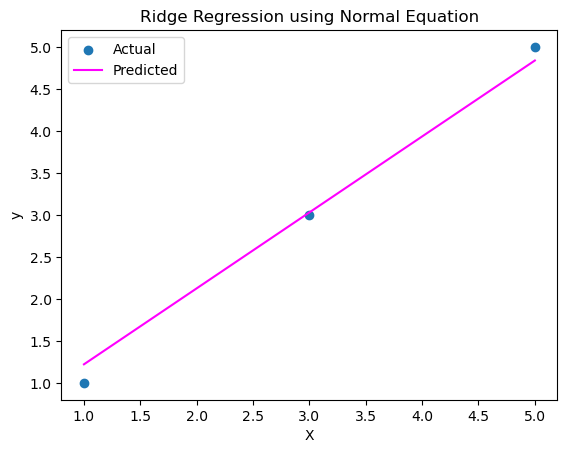

Beta values: [-0.08982036  0.49700599  0.40718563]


In [1]:
#Question 2: Implement closed form solution for Ridge regression

#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define feature matrix X and target value y
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 3, 5])


#Choose the regularization parameter 
alpha = 1

# add a column of 1 to the feature matrix    
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculate the beta values using the closed-form solution for Ridge Regression
lambda_I = alpha * np.eye(X_b.shape[1])  # Regularization term
XtX_inv = np.linalg.inv(np.dot(X_b.T, X_b) + lambda_I)
beta = np.dot(np.dot(XtX_inv, X_b.T), y)

# Plotting
plt.scatter(X[:, 0], y, label='Actual')
plt.plot(X[:, 0], beta[0] + beta[1] * X[:, 0] + beta[2] * X[:, 1], color='magenta', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression using Normal Equation')
plt.show()

print("Beta values:", beta)



In [2]:
#Question 4: For a given dataset, split, train and test
# Perform Linear regression, Ridge regression, Lasso and polynomial regression
#Print the MSE and the Estimated Model Co-efficients

#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error

#reading the dataset
dataset = pd.read_csv('regression_data.csv')
#drop rows with missing or null values from a dataset
dataset = dataset.dropna()
# Assign X and y vlaues with features and target respectively
X= dataset.iloc[:,:-1] # include all rows and columns except last
y= dataset.iloc[:,-1].values #include all values in last column only
dataset.head(5)

#Divide 20% of the dataset to train and the other subset to test 
#using train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


#function to perform Linear regression
def linear():
    #Create an instance
    regressor = LinearRegression()
    #Train the model using fit method
    regressor.fit(X_train, y_train)
    #Predict the target values using predict method
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Real Values':y_test,'Predicted Values':y_pred})
    mse = mean_squared_error(y_test,y_pred)
    xcoeff = regressor.coef_
    #Return MSE and EstimatedModelcoefficients 
    return(f"MSE: {mse}",f"Coefficient: {xcoeff}")
    
    
#function to perform Lasso regression
def lasso():
    #Create an instance
    regressor = Lasso()
    #Train the model using fit method
    regressor.fit(X_train, y_train)
    #Predict the target values using predict method
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Real Values':y_test,'Predicted Values':y_pred})
    mse = mean_squared_error(y_test,y_pred)
    xcoeff = regressor.coef_
    #Return MSE and EstimatedModelcoefficients 
    return(f"MSE: {mse:.1f}",f"Coefficient: {xcoeff}")
    
#function to perform Ridge regression
def ridge():
    print("Ridge:-")
    # List of alpha values to try
    alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]
    
    for alpha in alpha_values:
        # Create a Ridge Regression model with the current alpha value
        ridge_model = Ridge(alpha=alpha)
        
        # Fit the model using training data
        ridge_model.fit(X_train, y_train)
        
        # Make predictions on test data
        y_pred = ridge_model.predict(X_test)
        
        # Calculate MSE and x coefficients
        mse = mean_squared_error(y_test, y_pred)
        xcoeff =  ridge_model.coef_
       
        #print the values
        print(f"For alpha={alpha}:")
        print(f"MSE: {mse:.1f}")
        print(f"Coefficient: {xcoeff}")
        print("--------------------")

#function to perform polynomial regression
def poly():
    print("Polynomial :- ")
    #For each degree in the array, create polynomial features
    for degree in [1,2,5]:
        print("--------------------")
        poly = PolynomialFeatures(degree=degree)
        #learn from the data and apply the transformation in a single step
        X_poly = poly.fit_transform(X)
        #Create an instance
        poly.model = LinearRegression()
        #Train the given dataset using the fit method
        poly.model.fit(X_poly,y)
        # Predicting values
        y_pred = poly.model.predict(X_poly)
        # Calculate MSE and x coefficients
        mse = mean_squared_error(y, y_pred)
        xcoeff =  poly.model.coef_
        #print the values
        print(f"MSE for degree {degree}: {mse}")
        print(f"Coefficient: {xcoeff}")
    return ('----------------------')


print("--------------------")
print ("Linear = ",linear())

print("--------------------")
print ("Lasso = ",lasso())
print("--------------------")
ridge()
print("--------------------")
poly()



--------------------
Linear =  ('MSE: 1.9247594554953315e-15', 'Coefficient: [-2.40497210e-09 -8.24926616e-09  6.33151376e+01  9.51403342e+01\n  4.34125327e+00  2.28079772e+01 -7.11270567e-09  8.19188859e+01\n  2.69815920e-09  8.84206463e+01  2.12044840e+01  6.01611820e+01]')
--------------------
Lasso =  ('MSE: 16.4', 'Coefficient: [-0.         -0.         62.05931097 93.93441373  2.75271362 21.61262701\n -0.         81.24977322 -0.         87.54565086 19.96994326 59.32923217]')
--------------------
Ridge:-
For alpha=0.1:
MSE: 0.1
Coefficient: [-1.56985850e-02 -1.62424310e-03  6.32094573e+01  9.50125565e+01
  4.30843994e+00  2.27937309e+01 -2.93188469e-02  8.18355175e+01
 -1.09502643e-02  8.83148890e+01  2.11683654e+01  6.00989591e+01]
--------------------
For alpha=0.5:
MSE: 2.0
Coefficient: [-7.75871540e-02 -8.34020267e-03  6.27904466e+01  9.45052809e+01
  4.17939884e+00  2.27365810e+01 -1.45013546e-01  8.15034755e+01
 -5.41808323e-02  8.78944621e+01  2.10249972e+01  5.98514576e+01]

'----------------------'

In [1]:
jupyter nbconvert --to html

SyntaxError: invalid syntax (2451224419.py, line 1)

In [2]:
nbconvert --to html

SyntaxError: invalid syntax (3659175789.py, line 1)